### **Gradient Boosting Alogorithm for Regression Problem**

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')

**Data Preparation**

In [4]:
### Loading/reading Boston Housing data from sklearn dataset
boston = load_boston()

### Creating data frame

x = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.Series(boston.target)

In [3]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
y.head(10)

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
5    28.7
6    22.9
7    27.1
8    16.5
9    18.9
dtype: float64

In [8]:
y[0:10]

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
5    28.7
6    22.9
7    27.1
8    16.5
9    18.9
dtype: float64

In [9]:
### Split dataset into training set and test data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) #80% training and 20% test data

**Model Training and Evaluation**

In [11]:
### Create gradientboost regressor object

gradientregressor = GradientBoostingRegressor(max_depth=3, n_estimators=3, learning_rate=1)

***Important Parameters***

n_estimaters - Number of weak learners to train iteratively

learning_rate - Learning rate, default value as 1


In [13]:
### Train gradientboost regressor

model = gradientregressor.fit(x_train, y_train)

### Predict the response for the test dataset
y_pred = model.predict(x_test)

In [14]:
### R2 - Coefficient of determination - regression score function

r2_score(y_pred, y_test)

0.7568309591721156

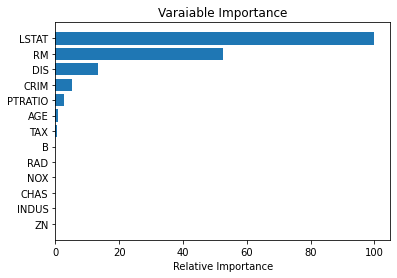

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

### Plot the feature importance
feature_importance = model.feature_importances_

### Make importance relative to max importance

feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Varaiable Importance')
plt.show()

**Tuning Hyperparameters**

In [24]:
from sklearn.model_selection import GridSearchCV

LR = {'learning_rate':[0.15,0.1,0.01,0.05], 'n_estimators':[100,150,200,250]}

tuning = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid = LR, scoring = 'r2')

tuning.fit(x_train, y_train)
tuning.best_params_, tuning.best_score_

({'learning_rate': 0.1, 'n_estimators': 200}, 0.8847405910996462)

**Similarly other hyperparameters like max_depth, split criteria, minimimum number of leaf nodes, etc can be tuned**

**Advantages:**

1. It iteratively corrects the mistakes of the weak classifiers and improves accuracy by combining weak learners
2. It gives better accuracy in most of the cases

**Disadvantages:**

1. Space and Time complexity
2. Hyperparameter tuning - we dont know which parameters will give more accuracy